<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Imports

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=0d4dc0b282cc1c99ea5b86bd4d9301da3d7a73f30a0d333e6ca476052bc329dc
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
fuzz.__version__

'0.4.2'

In [5]:
quality = ctrl.Antecedent(np.arange(0,11,1), 'quality')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(0,21,1), 'tip')

In [6]:
quality, service, tip

(Antecedent: quality, Antecedent: service, Consequent: tip)

In [7]:
quality.universe, service.universe, tip.universe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]))

##Membership Functions

In [8]:
quality.automf(number=3, names=['bad', 'good', 'great'])
service.automf(number=3, names=['low', 'medium', 'high'])

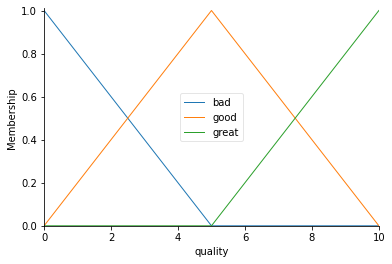

In [9]:
quality.view()

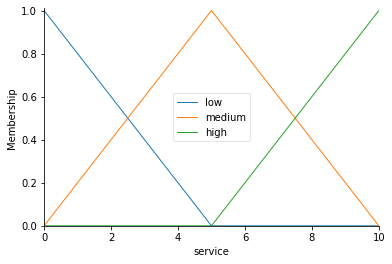

In [10]:
service.view()

In [11]:
tip['low'] = fuzz.trimf(tip.universe, [0,3,8])
tip['medium'] = fuzz.trimf(tip.universe, [4,9,14])
tip['high'] = fuzz.trimf(tip.universe, [10,15,20])

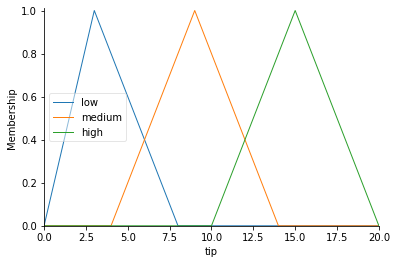

In [12]:
tip.view()

In [13]:
rule1 = ctrl.Rule(quality['bad'] | service['low'], tip['low'])
rule2 = ctrl.Rule(service['medium'], tip['medium'])
rule3 = ctrl.Rule(service['high'] | quality['great'], tip['high'])

##Control Sistem

In [14]:
control_system = ctrl.ControlSystem([rule1,rule2,rule3])
system = ctrl.ControlSystemSimulation(control_system)

In [15]:
def rate():
    system.input['quality'] = float(input('Type your rate about quality: '))
    system.input['service'] = float(input('Type your rate about service: '))
    system.compute()
    print(f"The probability tip value will be: {round(system.output['tip'],2)}")
    tip.view(sim = system)

Type your rate about quality: 4
Type your rate about service: 5
The probability tip value will be: 8.05


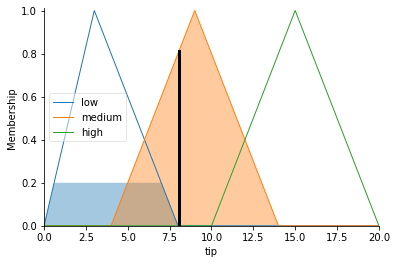

In [16]:
rate()

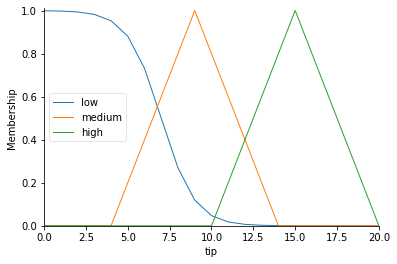

In [17]:
tip['low'] = fuzz.sigmf(tip.universe, 7, -1)
tip.view()

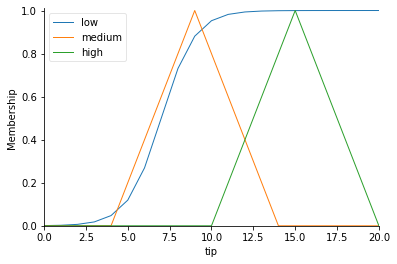

In [18]:
tip['low'] = fuzz.sigmf(tip.universe, 7, 1)
tip.view()

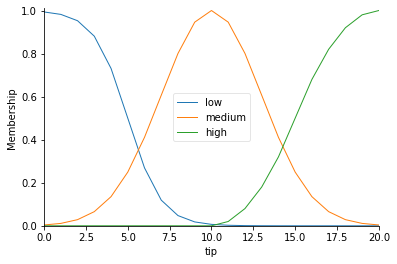

In [19]:
tip['low'] = fuzz.sigmf(tip.universe, 5, -1)
tip['medium'] = fuzz.gaussmf(tip.universe, 10, 3)
tip['high'] = fuzz.pimf(tip.universe, 10, 20, 20, 21)
tip.view()

In [20]:
rule1 = ctrl.Rule(quality['bad'] | service['low'], tip['low'])
rule2 = ctrl.Rule(service['medium'], tip['medium'])
rule3 = ctrl.Rule(service['high'] | quality['great'], tip['high'])
control_system = ctrl.ControlSystem([rule1,rule2,rule3])
system = ctrl.ControlSystemSimulation(control_system)
system.input['quality'] = 8.3
system.input['service'] = 7.3
system.compute()
# print(f"The probability tip value will be: {round(system.output['tip'],2)}")
# tip.view(sim = system)

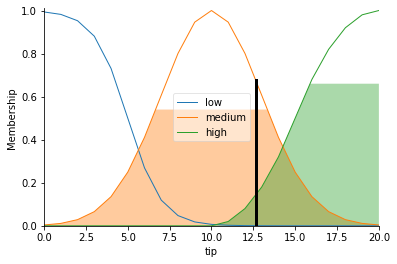

In [21]:
tip.view(sim = system)

Type your rate about quality: 4
Type your rate about service: 5
The probability tip value will be: 9.35


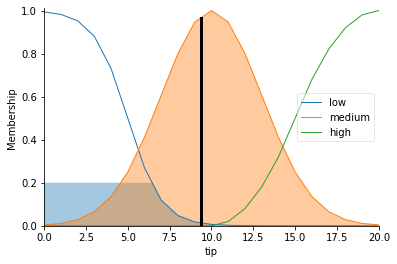

In [22]:
rate()

In [23]:
surface = ctrl.Antecedent(np.arange(0,6,1), 'surface')
dirty = ctrl.Antecedent(np.arange(0,6,1), 'dirty')
suction = ctrl.Consequent(np.arange(0,21,1), 'suction')
suction.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [24]:
surface.automf(number=3, names=['easy', 'moderate', 'hard'])
dirty.automf(number=3, names=['light', 'moderate', 'heavy'])

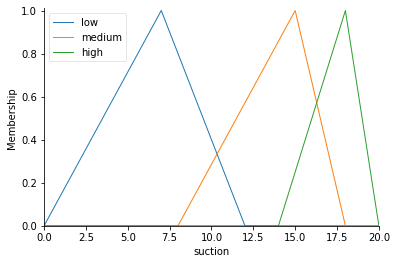

In [25]:
suction['low'] = fuzz.trimf(suction.universe, [0,7,12])
suction['medium'] = fuzz.trimf(suction.universe, [8,15,18])
suction['high'] = fuzz.trimf(suction.universe, [14,18,20])
suction.view()

In [26]:
rule1 = ctrl.Rule(surface['easy'] & dirty['light'], suction['low'])
rule2 = ctrl.Rule(surface['moderate'] & dirty['light'], suction['medium'])
rule3 = ctrl.Rule(surface['hard'] | dirty['heavy'], suction['high'])

In [27]:
control_system = ctrl.ControlSystem([rule1,rule2,rule3])
system = ctrl.ControlSystemSimulation(control_system)

In [28]:
system.input['surface'] = 2
system.input['dirty'] = 0
system.compute()

11.386524191154644


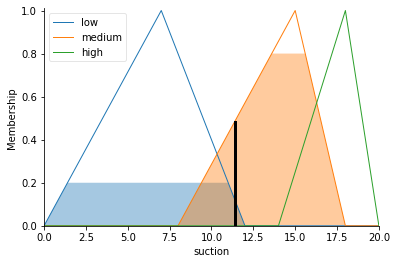

In [29]:
print(system.output['suction'])
suction.view(sim=system)

In [30]:
def cleaner():
    system.input['surface'] = float(input('Type level of surface: '))
    system.input['dirty'] = float(input('Type level of dirty: '))
    system.compute()
    print(f"The probability suction value will be: {round(system.output['suction'],2)}")
    suction.view(sim = system)

Type level of surface: 4
Type level of dirty: 5
The probability suction value will be: 17.33


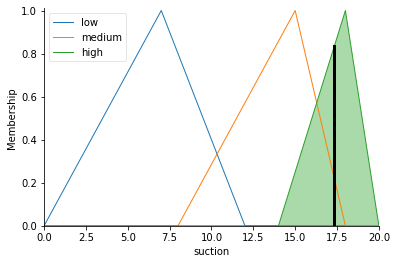

In [31]:
cleaner()

Type level of surface: 7
Type level of dirty: 6
The probability suction value will be: 17.33


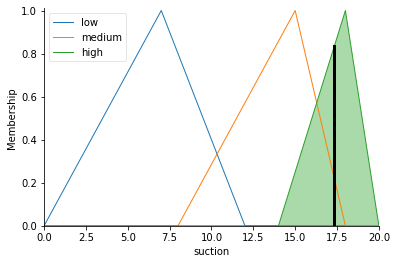

In [32]:
cleaner()

##Groupment

In [80]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
data = pd.read_csv('https://github.com/MpRonald/datasets/blob/main/credit_card_clients.csv?raw=true', header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [142]:
data.duplicated().sum()

0

In [143]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [144]:
data.shape

(30000, 25)

In [145]:
data['bill_total'] = data.BILL_AMT1 + data.BILL_AMT2 + data.BILL_AMT3 + data.BILL_AMT4 + data.BILL_AMT5 + data.BILL_AMT6
data.bill_total

0          7704
1         17077
2        101653
3        231334
4        109339
          ...  
29995    725349
29996     21182
29997     70496
29998    266611
29999    230874
Name: bill_total, Length: 30000, dtype: int64

In [146]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,bill_total
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339


In [147]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [154]:
data.bill_total.sort_values()

290      -336259
29491    -259523
26097    -125480
16747     -79530
21729     -69777
          ...   
26227    3293126
26547    3398917
8229     3465510
20892    3554591
2197     5263883
Name: bill_total, Length: 30000, dtype: int64

In [155]:
data.bill_total[2197]

5263883

In [158]:
data = data.drop(2197)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,bill_total
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,725349
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,21182
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,70496
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,266611


In [159]:
data.bill_total.sort_values()

290      -336259
29491    -259523
26097    -125480
16747     -79530
21729     -69777
          ...   
21381    3290058
26227    3293126
26547    3398917
8229     3465510
20892    3554591
Name: bill_total, Length: 29999, dtype: int64

In [160]:
X = data.iloc[:,[1,25]].values
X

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]])

In [161]:
X.min(), X.max()

(-336259, 3554591)

In [162]:
scaler_min = MinMaxScaler()
scaler_std = StandardScaler()
X_scaler = scaler_min.fit_transform(X)
X_std = scaler_std.fit_transform(X)

In [163]:
X_scaler

array([[0.01265823, 0.08840305],
       [0.13924051, 0.09081203],
       [0.10126582, 0.11254919],
       ...,
       [0.02531646, 0.10454142],
       [0.08860759, 0.15494558],
       [0.05063291, 0.14576069]])

In [164]:
X_std

array([[-1.137268  , -0.69224218],
       [-0.36601176, -0.66747651],
       [-0.59738863, -0.44400689],
       ...,
       [-1.06014237, -0.52633099],
       [-0.67451426, -0.00814917],
       [-0.90589113, -0.10257471]])

In [165]:
X_scaler.min(), X_scaler.max()

(0.0, 1.0000000000000002)

In [166]:
X_std.min(), X_std.max()

(-1.6010730707163334, 8.679464922003744)

In [167]:
group_min = fuzz.cmeans(data=X_scaler.T, c=5, m=2, error=.5e-2, maxiter=1000, init=None)
group_std = fuzz.cmeans(data=X_std.T, c=5, m=2, error=.5e-2, maxiter=1000, init=None)

In [168]:
pred_perc_min = group_min[1]
pred_perc_std = group_std[1]

In [169]:
pred_min = pred_perc_min.argmax(axis=0)
pred_std = pred_perc_std.argmax(axis=0)

In [170]:
pred_min

array([4, 4, 4, ..., 4, 4, 4])

In [171]:
pred_std

array([3, 3, 3, ..., 3, 3, 3])

In [172]:
np.unique(pred_min, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 3679,  4376,  7525,  1679, 12740]))

In [173]:
count_pred_min = np.unique(pred_min, return_counts=True)

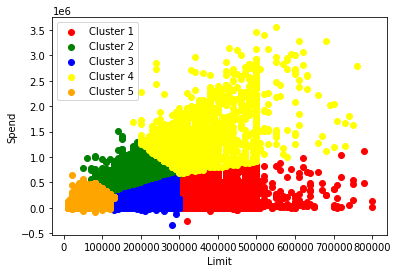

In [174]:
plt.scatter(X[pred_min == 0, 0], X[pred_min == 0, 1], c='red', label='Cluster 1')
plt.scatter(X[pred_min == 1, 0], X[pred_min == 1, 1], c='green', label='Cluster 2')
plt.scatter(X[pred_min == 2, 0], X[pred_min == 2, 1], c='blue', label='Cluster 3')
plt.scatter(X[pred_min == 3, 0], X[pred_min == 3, 1], c='yellow', label='Cluster 4')
plt.scatter(X[pred_min == 4, 0], X[pred_min == 4, 1], c='orange', label='Cluster 5')
plt.xlabel('Limit')
plt.ylabel('Spend')
plt.legend();



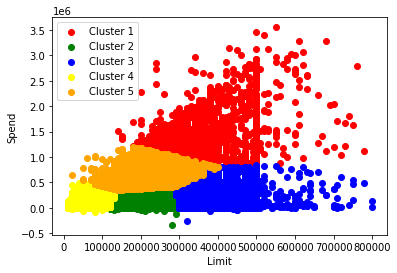

In [175]:
plt.scatter(X[pred_std == 0, 0], X[pred_std == 0, 1], c='red', label='Cluster 1')
plt.scatter(X[pred_std == 1, 0], X[pred_std == 1, 1], c='green', label='Cluster 2')
plt.scatter(X[pred_std == 2, 0], X[pred_std == 2, 1], c='blue', label='Cluster 3')
plt.scatter(X[pred_std == 3, 0], X[pred_std == 3, 1], c='yellow', label='Cluster 4')
plt.scatter(X[pred_std == 4, 0], X[pred_std == 4, 1], c='orange', label='Cluster 5')
plt.xlabel('Limit')
plt.ylabel('Spend')
plt.legend();

In [176]:
fpcs = []
for n_clusters in range(2,11):
    centroids, pred, _, _, _, _, fpc = fuzz.cmeans(
        data=X.T, c=n_clusters, m=2, error=.5e-2, maxiter=1000, init=None)
    fpcs.append(fpc)

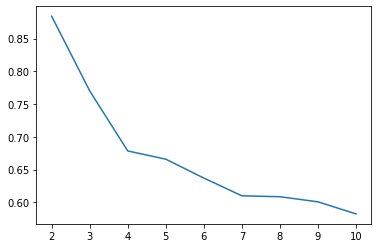

In [177]:
f, ax = plt.subplots()
ax.plot(range(2,11), fpcs);

In [178]:
colors = ['blue', 'orange', 'green', 'red', 'yellow', 'black', 'brown', 'cyan', 'magenta', 'forestgreen']

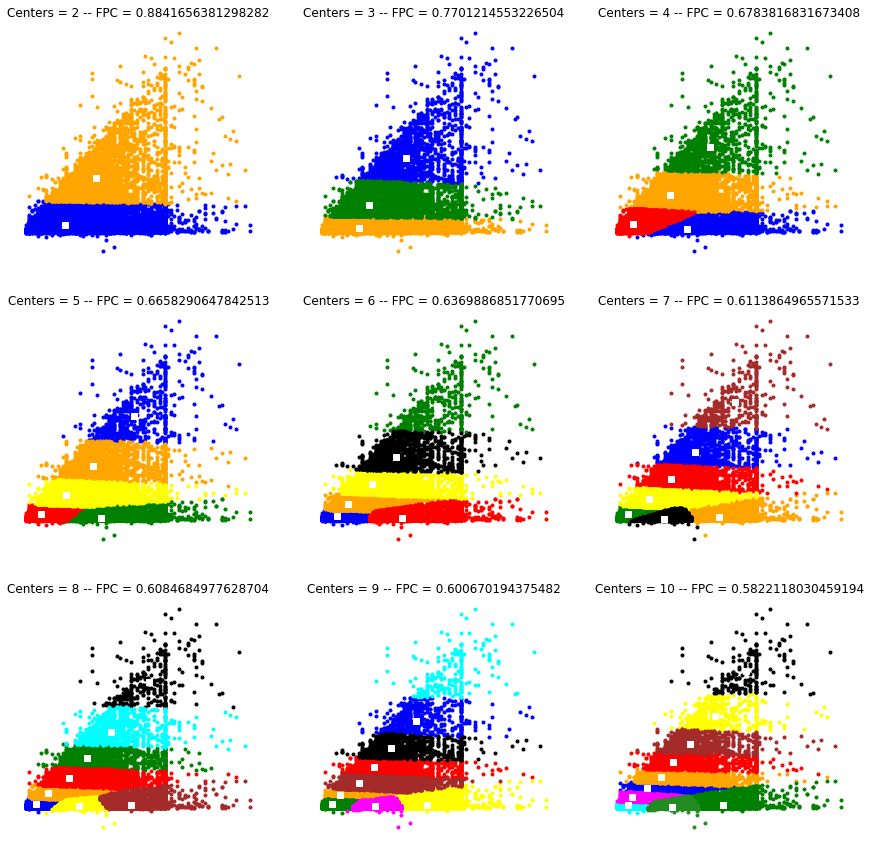

In [179]:
fig, axes = plt.subplots(3,3, figsize=(15,15))
fpcs = []
for n_clusters, ax in enumerate(axes.reshape(-1),2):
    centroids, pred, _, _, _, _, fpc = fuzz.cmeans(
        data=X.T, c=n_clusters, m=2, error=.5e-2, maxiter=1000, init=None)
    fpcs.append(fpc)

    pred = np.argmax(pred, axis=0)

    for i in range(n_clusters):
        ax.plot(X[pred == i, 0], X[pred == i, 1], '.', color=colors[i])
    
    for centers in centroids:
        ax.plot(centers[0], centers[1], 'ws')

    ax.set_title(f'Centers = {n_clusters} -- FPC = {fpc}')
    ax.axis('off')